In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import scipy.stats as stats
from scipy.special import kl_div
from IPython.display import HTML
%matplotlib inline

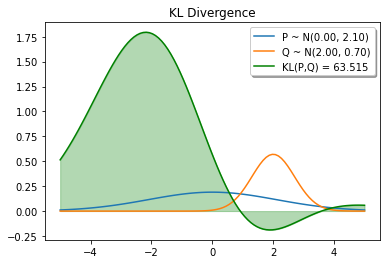

In [2]:
mu_P, s2_P = 0, 2.1
mu_Q, s2_Q = 2, 0.7

x = np.linspace(-5, 5, 100)
P = stats.norm.pdf(x, mu_P, s2_P)
Q = stats.norm.pdf(x, mu_Q, s2_Q)
KL = P * np.log(np.divide(P, Q))

plt.plot(x, P)
plt.plot(x, Q)
plt.plot(x, KL, color='g')
plt.fill_between(x, 0, KL, alpha=0.3, color='g')
plt.title('KL Divergence')
plt.legend((f'P ~ N({mu_P:.2f}, {s2_P:.2f})', f'Q ~ N({mu_Q:.2f}, {s2_Q:.2f})', f'KL(P,Q) = {np.trapz(KL):0.3f}'),
           loc='upper right', shadow=True);

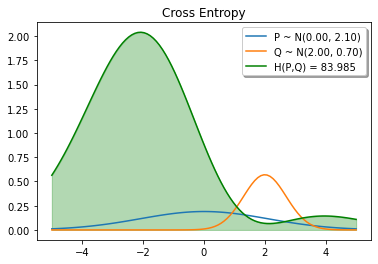

In [3]:
mu_P, s2_P = 0, 2.1
mu_Q, s2_Q = 2, 0.7

x = np.linspace(-5, 5, 100)
P = stats.norm.pdf(x, mu_P, s2_P)
Q = stats.norm.pdf(x, mu_Q, s2_Q)
CE = -P * np.log(Q)

plt.plot(x, P)
plt.plot(x, Q)
plt.plot(x, CE, color='g')
plt.fill_between(x, 0, CE, alpha=0.3, color='g')
plt.title('Cross Entropy')
plt.legend((f'P ~ N({mu_P:.2f}, {s2_P:.2f})', f'Q ~ N({mu_Q:.2f}, {s2_Q:.2f})', f'H(P,Q) = {np.trapz(CE):0.3f}'),
           loc='upper right', shadow=True);

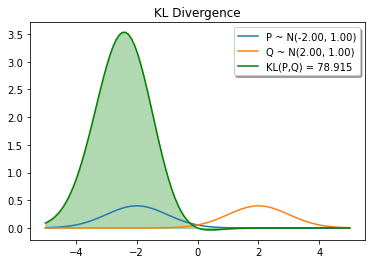

In [4]:
mu_P, s2_P = -2, 1
mu_Q, s2_Q = 2, 1

x = np.linspace(-5, 5, 100)
P = stats.norm.pdf(x, mu_P, s2_P)
Q = stats.norm.pdf(x, mu_Q, s2_Q)
KL = P * np.log(np.divide(P, Q))

plt.plot(x, P)
plt.plot(x, Q)
plt.plot(x, KL, color='g')
plt.fill_between(x, 0, KL, alpha=0.3, color='g')
plt.title('KL Divergence')
plt.legend((f'P ~ N({mu_P:.2f}, {s2_P:.2f})', f'Q ~ N({mu_Q:.2f}, {s2_Q:.2f})', f'KL(P,Q) = {np.trapz(KL):0.3f}'),
           loc='upper right', shadow=True);

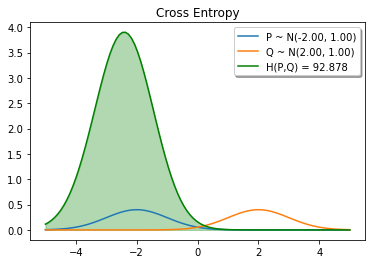

In [5]:
mu_P, s2_P = -2, 1
mu_Q, s2_Q = 2, 1

x = np.linspace(-5, 5, 100)
P = stats.norm.pdf(x, mu_P, s2_P)
Q = stats.norm.pdf(x, mu_Q, s2_Q)
CE = -P * np.log(Q)

plt.plot(x, P)
plt.plot(x, Q)
plt.plot(x, CE, color='g')
plt.fill_between(x, 0, CE, alpha=0.3, color='g')
plt.title('Cross Entropy')
plt.legend((f'P ~ N({mu_P:.2f}, {s2_P:.2f})', f'Q ~ N({mu_Q:.2f}, {s2_Q:.2f})', f'H(P,Q) = {np.trapz(CE):0.3f}'),
           loc='upper right', shadow=True);

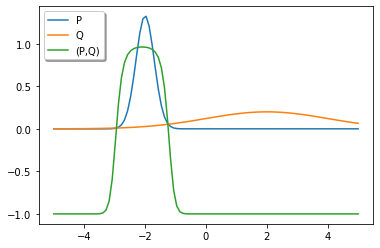

In [6]:
x = np.linspace(-5, 5, 100)
P = stats.norm.pdf(x, -2, 0.3)
Q = stats.norm.pdf(x, 2, 2)
CE = np.divide(P * np.log(np.divide(P, Q)) + Q * np.log(np.divide(Q, P)), P * np.log(np.divide(P, Q)) - Q * np.log(np.divide(Q, P)))

plt.plot(x, P)
plt.plot(x, Q)
plt.plot(x, CE)
plt.legend(('P', 'Q', '(P,Q)'),
           loc='upper left', shadow=True);

In [7]:
mu_P, s2_P = 0, 1
mu_Q, s2_Q = -8, 1
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
fig.set_size_inches(12, 8, True)
lines = [plt.plot([], [])[0] for _ in range(3)] 
fill = [ax.fill_between(x, 0, np.finfo(float).eps, facecolor='g', alpha=0.3, animated=True)]
ax.set_xlim([-6, 6])
ax.set_ylim([-0.5, 3.5])
plt.title('KL Divergence')

def init():
    for line in lines:
        line.set_data([], [])
    return lines + fill

def animate(i):
    global x, mu_P, s2_P, mu_Q, s2_Q
    
    mu_Q = -8 + i/16
    P = stats.norm.pdf(x, mu_P, s2_P)
    Q = stats.norm.pdf(x, mu_Q, s2_Q)
    KL = P * np.log(np.divide(P, Q + np.finfo(float).eps))
    lines[0].set_data(x, P)
    lines[0].set_label(f'P ~ N({mu_P:.2f}, {s2_P:.2f})')
    lines[1].set_data(x, Q)
    lines[1].set_label(f'Q ~ N({mu_Q:.2f}, {s2_Q:.2f})')
    lines[2].set_data(x, KL)
    lines[2].set_label(f'KL(P,Q) = {np.trapz(KL):0.3f}')
    fill[0].remove()
    fill[0] = ax.fill_between(x, KL, 0, facecolor='g', alpha=0.3, animated=True)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper right', shadow=True)
    return lines + fill

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=256, interval=25, blit=True)
#anim.save('KL_Divergence_normal_distributions.mp4', fps=30, dpi=100, extra_args=['-vcodec', 'libx264'])
plt.close()
HTML(anim.to_html5_video())

In [8]:
mu_P, s2_P = 0, 1
mu_Q, s2_Q = -8, 1
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
fig.set_size_inches(12, 8, True)
lines = [plt.plot([], [])[0] for _ in range(3)] 
fill = [ax.fill_between(x, 0, np.finfo(float).eps, facecolor='y', alpha=0.3, animated=True)]
ax.set_xlim([-6, 6])
ax.set_ylim([-0.5, 3.5])
plt.title('Cross Entropy')

def init():
    for line in lines:
        line.set_data([], [])
    lines[2].set_color('y')
    return lines + fill

def animate(i):
    global x, mu_P, s2_P, mu_Q, s2_Q
    
    mu_Q = -8 + i/16
    P = stats.norm.pdf(x, mu_P, s2_P)
    Q = stats.norm.pdf(x, mu_Q, s2_Q)
    CE = -P * np.log(Q + np.finfo(float).eps)
    lines[0].set_data(x, P)
    lines[0].set_label(f'P ~ N({mu_P:.2f}, {s2_P:.2f})')
    lines[1].set_data(x, Q)
    lines[1].set_label(f'Q ~ N({mu_Q:.2f}, {s2_Q:.2f})')
    lines[2].set_data(x, CE)
    lines[2].set_label(f'H(P,Q) = {np.trapz(CE):0.3f}')
    fill[0].remove()
    fill[0] = ax.fill_between(x, CE, 0, facecolor='y', alpha=0.3, animated=True)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper right', shadow=True)
    return lines + fill

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=256, interval=25, blit=True)
#anim.save('Cross_Entropy_normal_distributions.mp4', fps=30, dpi=100, extra_args=['-vcodec', 'libx264'])
plt.close()
HTML(anim.to_html5_video())

In [9]:
mu_P, s2_P = 0, 1
mu_Q, s2_Q = -8, 1
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
fig.set_size_inches(12, 8, True)
lines = [plt.plot([], [])[0] for _ in range(4)] 
fill = [ax.fill_between(x, 0, np.finfo(float).eps, facecolor='g', alpha=0.2, animated=True),
        ax.fill_between(x, 0, np.finfo(float).eps, facecolor='r', alpha=0.2, animated=True)]
ax.set_xlim([-6, 6])
ax.set_ylim([-0.5, 3.5])
plt.title('KL Divergence & Cross Entropy')

def init():
    for line in lines:
        line.set_data([], [])
    return lines + fill

def animate(i):
    global x, mu_P, s2_P, mu_Q, s2_Q
    
    mu_Q = -8 + i/16
    P = stats.norm.pdf(x, mu_P, s2_P)
    Q = stats.norm.pdf(x, mu_Q, s2_Q)
    KL = P * np.log(np.divide(P, Q + np.finfo(float).eps))
    CE = -P * np.log(Q + np.finfo(float).eps)
    lines[0].set_data(x, P)
    lines[0].set_label(f'P ~ N({i}, {s2_P:.2f})')
    lines[1].set_data(x, Q)
    lines[1].set_label(f'Q ~ N({mu_Q:.2f}, {s2_Q:.2f})')
    lines[2].set_data(x, KL)
    lines[2].set_label(f'KL(P,Q) = {np.trapz(KL):0.3f}')
    lines[3].set_data(x, CE)
    lines[3].set_label(f'H(P,Q) = {np.trapz(CE):0.3f}')
    fill[0].remove()
    fill[0] = ax.fill_between(x, KL, 0, facecolor='g', alpha=0.2, animated=True)
    fill[1].remove()
    fill[1] = ax.fill_between(x, CE, 0, facecolor='r', alpha=0.2, animated=True)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper right', shadow=True)
    return lines + fill

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=256, interval=25, blit=True)
anim.save('KL_Divergence_&_Cross_Entropy_normal_distributions_N(0,1)_&_N(x,1).mp4', fps=30, dpi=100, extra_args=['-vcodec', 'libx264'])
plt.close()
HTML(anim.to_html5_video())

In [ ]:
mu_P, s2_P = 0, 2
mu_Q, s2_Q = -8, 1
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
fig.set_size_inches(12, 8, True)
lines = [plt.plot([], [])[0] for _ in range(4)] 
fill = [ax.fill_between(x, 0, np.finfo(float).eps, facecolor='g', alpha=0.2, animated=True),
        ax.fill_between(x, 0, np.finfo(float).eps, facecolor='r', alpha=0.2, animated=True)]
ax.set_xlim([-6, 6])
ax.set_ylim([-0.5, 3.5])
plt.title('KL Divergence & Cross Entropy')

def init():
    for line in lines:
        line.set_data([], [])
    return lines + fill

def animate(i):
    global x, mu_P, s2_P, mu_Q, s2_Q
    
    mu_Q = -8 + i/16
    P = stats.norm.pdf(x, mu_P, s2_P)
    Q = stats.norm.pdf(x, mu_Q, s2_Q)
    KL = P * np.log(np.divide(P, Q + np.finfo(float).eps))
    CE = -P * np.log(Q + np.finfo(float).eps)
    lines[0].set_data(x, P)
    lines[0].set_label(f'P ~ N({mu_P:.2f}, {s2_P:.2f})')
    lines[1].set_data(x, Q)
    lines[1].set_label(f'Q ~ N({mu_Q:.2f}, {s2_Q:.2f})')
    lines[2].set_data(x, KL)
    lines[2].set_label(f'KL(P,Q) = {np.trapz(KL):0.3f}')
    lines[3].set_data(x, CE)
    lines[3].set_label(f'H(P,Q) = {np.trapz(CE):0.3f}')
    fill[0].remove()
    fill[0] = ax.fill_between(x, KL, 0, facecolor='g', alpha=0.2, animated=True)
    fill[1].remove()
    fill[1] = ax.fill_between(x, CE, 0, facecolor='r', alpha=0.2, animated=True)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper right', shadow=True)
    return lines + fill

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=256, interval=25, blit=True)
anim.save('KL_Divergence_&_Cross_Entropy_normal_distributions_N(0,2)_&_N(x,1).mp4', fps=30, dpi=100, extra_args=['-vcodec', 'libx264'])
plt.close()
HTML(anim.to_html5_video())